# PLACEMENT PREDICTOR

## Steps:-
1. Preprocess + EDA + Feature Selection
2. Extract input and output columns
3. Scale the values
4. Train test split
5. Train the model
6. Evaluate the model/model selection
7. Deploy the model 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/home/harishwargad/Documents/Datasets/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [6]:
# Preprocess
df = df.iloc[:, 1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
import matplotlib.pyplot as plt 

Text(0, 0.5, 'IQ')

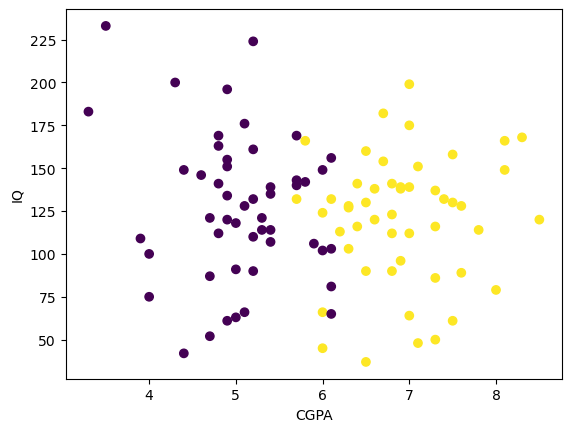

In [9]:
# EDA
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])
plt.xlabel('CGPA')
plt.ylabel('IQ')

In [10]:
# Extract input and ouput columns
x = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [11]:
x.shape

(100, 2)

In [12]:
y.shape

(100,)

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [14]:
x_train

,cgpa,iq
74,6.7,154.0
93,6.8,112.0
7,5.0,63.0
36,5.7,140.0
37,8.1,149.0
...,...,...
14,6.1,103.0
71,6.1,132.0
81,5.4,107.0
41,5.4,114.0


In [15]:
y_train

74    1
93    1
7     0
36    0
37    1
     ..
14    0
71    1
81    0
41    0
33    0
Name: placement, Length: 90, dtype: int64

In [16]:
x_test

,cgpa,iq
1,5.9,106.0
48,6.6,138.0
28,5.2,90.0
18,4.0,100.0
9,5.1,66.0
46,5.3,114.0
54,6.4,141.0
60,6.9,139.0
4,5.8,142.0
31,3.9,109.0


In [17]:
y_test

1     0
48    1
28    0
18    0
9     0
46    0
54    1
60    1
4     0
31    0
Name: placement, dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
x_train = scaler.fit_transform(x_train)

In [21]:
x_train

array([[ 0.573535  ,  0.71763883],
       [ 0.66102339, -0.30717219],
       [-0.91376763, -1.50278505],
       [-0.3013489 ,  0.37603516],
       [ 1.79837245,  0.59563752],
       [ 1.36093051, -0.86837823],
       [-0.73879085,  0.88844067],
       [ 0.22358144, -0.52677455],
       [ 1.27344212, -1.55158558],
       [ 0.66102339, -0.84397797],
       [ 0.74851178,  0.32723463],
       [-0.3013489 ,  0.44923594],
       [ 0.66102339, -0.03876931],
       [-1.17623279, -0.91717875],
       [ 1.71088406, -1.11238085],
       [-1.0887444 , -0.30717219],
       [ 0.39855822, -0.84397797],
       [-1.26372118,  0.52243673],
       [-0.3013489 ,  0.18083306],
       [-0.03888373, -0.55117482],
       [ 0.13609305, -0.28277193],
       [ 1.09846534,  0.30283437],
       [ 1.18595373,  0.18083306],
       [-0.73879085,  0.18083306],
       [ 0.04860466,  0.76643935],
       [ 1.79837245,  1.01044198],
       [-1.00125601, -0.11197009],
       [ 1.27344212,  0.13203253],
       [-1.00125601,

In [22]:
x_test = scaler.fit_transform(x_test)
x_test

array([[ 0.4037821 , -0.35063846],
       [ 1.1285192 ,  0.96941222],
       [-0.320955  , -1.01066381],
       [-1.56336146, -0.59814797],
       [-0.42448887, -2.00070183],
       [-0.21742113, -0.02062579],
       [ 0.92145145,  1.09316698],
       [ 1.43912081,  1.01066381],
       [ 0.30024823,  1.13441856],
       [-1.66689533, -0.22688371]])

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
clf = LogisticRegression()

In [25]:
clf.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [26]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0])

In [27]:
y_test

1     0
48    1
28    0
18    0
9     0
46    0
54    1
60    1
4     0
31    0
Name: placement, dtype: int64

In [28]:
from sklearn.metrics import accuracy_score 

In [29]:
accuracy_score(y_test, y_pred)

0.8

In [30]:
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions

<Axes: >

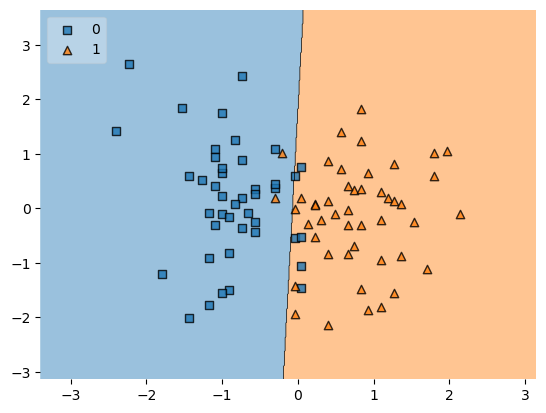

In [31]:
plot_decision_regions(x_train, y_train.values, clf = clf, legend = 2)

In [32]:
import pickle 

In [33]:
pickle.dump(clf, open('model.pkl', 'wb'))